In this tutorial, we're going to use the Wisconsin breast cancer diagnostics dataset, which is included as an example dataset in sci-kit learn.  It consists of 30 morphological features from 569 breast tumour biopsies, along with a label of "malignant" or "benign".

We start by loading in the data and necessary packages.

In [ ]:
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
normalized_data = StandardScaler().fit_transform(breast_cancer.data)

There's a reason this is a classic ML demonstration dataset: The features can predict the target using a linear model with near perfect accuracy.  When we do PCA and color the samples by diagnosis, we see an almost perfect seperation with just two principal components.

Text(0, 0.5, 'PC2')

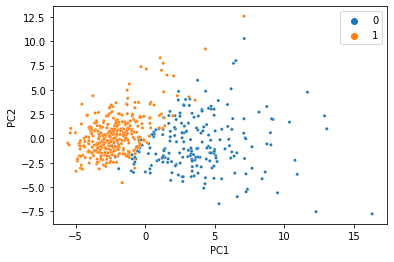

In [96]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)
ax=sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=breast_cancer.target,s=10)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

We were able to condense all 30 features into just two PCs, and the information we care about is still there.  That's less than 7% of the size of the original data, so it's not too hard to believe we don't need 100% of the data to get a meaningful low-dimensional representation.  Let's simulate what would happen if 20% of the data was missing, and replaced with NaN.

In [100]:
missing_mask=np.random.rand(*normalized_data.shape)<0.2
missing_data=normalized_data.copy()
missing_data[missing_mask]=np.nan
missing_data[0:5, 0:5]

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633],
       [ 1.82982061, -0.35363241,  1.68595471,         nan,         nan],
       [ 1.57988811,  0.45618695,  1.56650313,  1.55888363,  0.94221044],
       [-0.76890929,  0.25373211,         nan, -0.76446379,         nan],
       [ 1.75029663, -1.15181643,  1.77657315,  1.82622928,         nan]])

If you tried giving sklearn's PCA function this new matrix, you'd definitely get an error, so we'll use the MC class in SpaLoR.  We can use it the same way we used PCA:

134.6359292499708
87.59619740236222
80.10341659272822
76.4111674456581
73.53403972183311
71.8611509793024
71.03469589132041
70.64235945899881
70.45652372934437
70.3678285679417
70.32508992586234
70.304303872847
70.29411067407366
70.28907725163766
70.28657783462033
70.28533132085833
70.28470760724113
70.2843947531342
70.28423754012066
70.28415843309452
70.28411858887675
70.28409850608615
70.28408837847668
70.28408326928263
70.28408069108845
70.2840793898284
70.28407873296625
70.28407840135523
70.28407823393194
70.28407814939898
70.28407810671615
70.28407808516393
70.28407807428113
70.28407806878579
70.28407806601085
70.2840780646096
70.28407806390202
70.2840780635447
70.28407806336428
70.28407806327316
70.28407806322714
70.2840780632039
70.28407806319218
70.28407806318624
70.28407806318327
70.28407806318175
70.28407806318098
70.2840780631806
70.2840780631804
70.28407806318032
70.28407806318026
70.28407806318023
70.28407806318022
70.28407806318023
70.28407806318022
70.28407806318022
70.2

<AxesSubplot:>

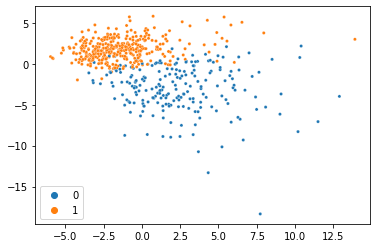

In [82]:
from spalor.models import MC
mc = MC(n_components=2)
pca_missing_data=mc.fit_transform(missing_data)
ax=sns.scatterplot(x=pca_missing_data[:,0], y=pca_missing_data[:,1], hue=breast_cancer.target,s=10)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

And voilà, we just did PCA with missing data and got almost the same thing!  This dataset is so clean, we can actually do it with much less data too.  Here's the same thing with 80% of the data missing:

66.80718972994511
56.39960590826341
50.12258260348312
46.09378875774983
43.32687322835775
41.32689571425764
39.83103308399128
38.682673909951525
37.77974352878113
37.05304990235792
36.45523134376485
35.95382178718301
35.526467669005555
35.157588776588256
34.83609168974647
34.553844768129736
34.30468555808306
34.08378636214404
33.88725231346993
33.711865996096115
33.55492248847632
33.41411955583304
33.28748144334522
33.17330336339108
33.07010904386097
32.9766168579552
32.891711912462284
32.81442254671791
32.743900303691696
32.67940277031846
32.62027886370561
32.56595623424954
32.51593050784487
32.46975612077302
32.42703852471235
32.387427561185916
32.350611826578906
32.316313870765725
32.28428609382709
32.254307225618234
32.22617929150431
32.19972498405369
32.174785374732835
32.15121791170374
32.128894659833236
32.10770074719866
32.08753298896489
32.0682986647667
32.04991442989613
32.03230534388019
32.01540400262459
31.999149762346946
31.983488045152864
31.968369717419684
31.95375053322

Text(0, 0.5, 'PC2')

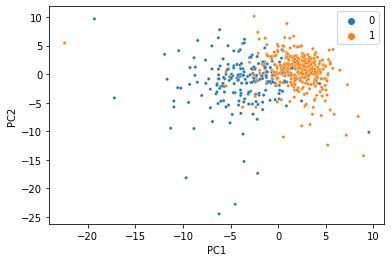

In [101]:
missing_mask = np.random.rand(*normalized_data.shape) <0.8
missing_data = normalized_data.copy()
missing_data[missing_mask] = np.nan
mc = MC(n_components=2)
pca_missing_data=mc.fit_transform(missing_data)
ax=sns.scatterplot(x=pca_missing_data[:,0], y=pca_missing_data[:,1], hue=breast_cancer.target,s=10)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

At this point, the seperation gets a little messier, but for just 20% of the data it's not bad at all!